# 1. Cosmology Introduction

This notebook will step you through some of the simple steps needed to calculate and plot the expansion of the universe as a function of time. 

You can download this as a Jupyter Notebook from https://github.com/AstroUQ/PHYS3080/tree/main/cosmo/docs/notebooks (click on the file, when it opens right click on "Raw" then "Save Link As...").



## 1.1 How old is the universe?

In order to calculate how the expansion of the universe changes with time one needs to integrate over the changing expansion history.  

We define an overdot to mean differentiation with respect to time: $\dot{a}=da/dt$.  Which means that,
    
\begin{equation} \int_0^t dt = \int_0^a \frac{da}{\dot{a}}. \end{equation}

That is convenient because we know an equation for $\dot{a}$ as a function of $a$, Friedmann's equation!  Let's start with a simple flat matter-dominated universe, for which Friedmann's equation gives,

$$ \dot{a} = H_0 a^{-1/2}. $$

It's easy to show analytically that in this flat matter dominated case the integral above for scalefactor as a function of time becomes, 

$$ t = \frac{2}{3H_0}a^{3/2}. $$

For more complex models there's no simple analytic solution, so we will want to do that numerically.  Let's see how to do it numerically in this simple case first.


In [2]:
# First let's set up our packages
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate

# And set some constants
c = 299792.458 # km/s (speed of light)

H0kmsmpc = 70.  # Hubble constant in km/s/Mpc
H0s = H0kmsmpc * 3.2408e-20 # H0 in inverse seconds is H0 in km/s/Mpc * (3.2408e-20 Mpc/km)
H0y = H0s * 3.154e7 * 1.e9 # H0 in inverse Giga years is H0 in inverse seconds * (3.154e7 seconds/year) * (1e9 years / Giga year)
print('Hubble time = ',1/H0y,'Gyr')

# Let's format that to a more appropriate number of significant figures.  
# The first % means put the variable here.  The .2f means make it a float with 2 decimal places.
print('Hubble time = %.2f Gyr'%(1/H0y))

Hubble time =  13.976165695516954 Gyr
Hubble time = 13.98 Gyr


In [2]:
# Write a function for the integrand, i.e. $1/\dot{a}$ (adot inverse)
# I'm going to keep the constant H_0 outside the integral and add it later.
def adotinv_flatmatter(a):
    return np.sqrt(a) 

# First note some weird python notation, if you say "x, y = 1, 2" it's the same as saying "x=1" and "y=2".

# Now integrate that equation from scalefactor 0 to 1 (as an example) which will give the age of the universe today (because we define a so that a=1 today):
age_Hubble, uncert = integrate.quad(adotinv_flatmatter,0,1) 
# This returns age in Hubble times, and the uncertainty in the numerical integral

# Convert that to billions of years
age_Gyr = age_Hubble/H0y # Age in Gyr

print('Age of the universe in Hubble times = %.3f which is %.2f Gyr'%(age_Hubble,age_Gyr))
print('Does this match the analytic prediction of 2/3 Hubble times?  Yes!')
print('')
print('Uncertainty on the numerical integral is ', uncert, 'so should be negligible.') # It's good to check this to check that the integral has succeeded.

# Note, to get just the age without the uncertainty you can use [0] to get the first element that's returned,
# and then you can also divide by H0y immediately to get the age in one step
age_Gyr_easier = integrate.quad(adotinv_flatmatter,0,1)[0] / H0y 

print('Just checking that the one-step age calculation (%.2f Gyr) matches the two step one (%.2f Gyr).'%(age_Gyr_easier,age_Gyr))



Age of the universe in Hubble times = 0.667 which is 9.32 Gyr
Does this match the analytic prediction of 2/3 Hubble times?  Yes!

Uncertainty on the numerical integral is  7.401486830834379e-16 so should be negligible.
Just checking that the one-step age calculation (9.32 Gyr) matches the two step one (9.32 Gyr).


### 1.1.1 For you!
Now you can have a go and change the limits of the integral so you can measure different times.  
For example how old was the universe when it was half its current size?  
How long will it take to expand from now to twice it's current size?

In [3]:
age_Hubble_halfa, uncert = integrate.quad(adotinv_flatmatter,0,0.5)     # integrate 1/sqrt(a)  from 0 to 0.5
age_half_Gyr = age_Hubble_halfa/H0y # Age in Gyr  note that H0y is 70km/s/Mpc  --this is eqn 1. 

print('Age of a flat, matter dominated universe at half of its current size = %.3f which is %.2f Gyr'%(age_Hubble_halfa,age_half_Gyr))





Age of a flat, matter dominated universe at half of its current size = 0.236 which is 3.29 Gyr


In [4]:
age_Hubble_2a, uncert = integrate.quad(adotinv_flatmatter,0,2)     # integrate 1/sqrt(a)  from 0 to 2
age_2a_Gyr = age_Hubble_2a/H0y # Age in Gyr  note that H0y is 70km/s/Mpc  --this is eqn 1. 

print('Age of a flat, matter dominated universe at twice its current size = %.3f which is %.2f Gyr'%(age_Hubble_2a,age_2a_Gyr))

t_until_2a = age_2a_Gyr-age_Gyr
print('A flat, matter dominated universe will reach twice its size in = %.3f Gyr'%(t_until_2a))

Age of a flat, matter dominated universe at twice its current size = 1.886 which is 26.35 Gyr
A flat, matter dominated universe will reach twice its size in = 17.036 Gyr


## 1.2 Scalefactor vs time

Now let's try to calculate the time not just at one value of scalefactor, but a whole array.  We can then make a plot of scalefactor vs time.

1.2 EINSTEIN/DESITTER UNIVERSE (FLAT, and MATTER DOMINATED) plot Scale factor vs Time (ie. age at every scale factor between 0 and 2)

In [5]:
# Start by making an array of scalefactors
astart = 0.0
astop = 2.1
astep = 0.1 # Make this finer to make the plot smoother
a_arr = np.arange(astart,astop,astep)
print('a_arr=',a_arr)

a_arr= [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2. ]


2.0


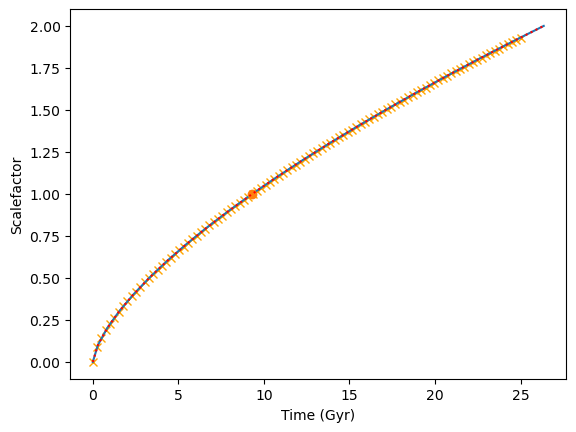

In [6]:
# First set up an array of times (initially all set to zero) into which we'll put our calculated times
t_Gyr = np.zeros(len(a_arr))  # len(a_arr) gives the length of the a_arr 

# Make a loop and do that integral for every final value of a (starting at a=0 every time)
for i,a_end in enumerate(a_arr): # enumerate adds an index to each value
    t_Hubble,uncert = integrate.quad(adotinv_flatmatter,0,a_end)
    t_Gyr[i] = t_Hubble/H0y
print(a_end)

# It's good practise to compare it to the analytic calculation when available
t_analytic_Gyr = np.array([(2*a_end**(3/2))/(3*H0y) for a_end in a_arr])

# analytic calculation this time a is the function and its done in terms of t
def a_func(t):
    return t**(2/3) * (H0y*3/2)**(2/3)      #  this is equation 2, note that   H0y =  0.07155
t_arr = np.linspace(0, 25, 100)              # Define the time array
a_arry = a_func(t_arr)                        # Evaluate the function for the time array

# Plot the function
plt.plot(t_arr, a_arry,'x',color='orange')


plt.plot(t_Gyr,a_arr)
plt.plot(age_Gyr, 1.0,'o') # Put a dot at the current time
plt.plot(t_analytic_Gyr, a_arr,':',color='red')
plt.xlabel('Time (Gyr)')
plt.ylabel('Scalefactor')
plt.show()

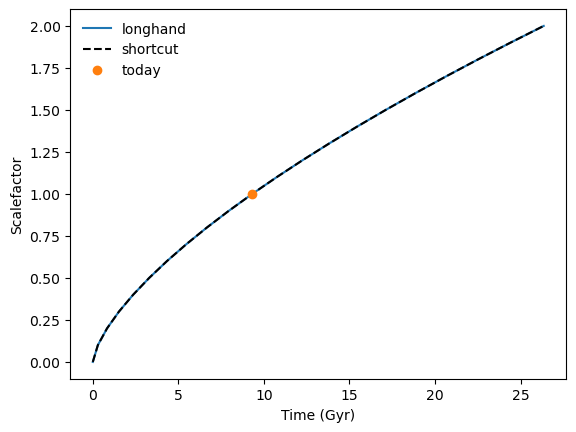

[ 0.          0.29464344  0.83337751  1.53101224  2.35714755  3.29421385
  4.33035656  5.45687294  6.66702007  7.95537298  9.3174438  10.74943925
 12.24809795 13.81057657 15.43436745 17.11723726 18.8571804  20.65238268
 22.50119272 24.40209891 26.35371077]


In [7]:
# You might be interested to know that python has some shortcuts.  The whole step above (except the plotting) can be done in 
# one line:
t2_Gyr = np.array([integrate.quad(adotinv_flatmatter, 0, a_end)[0] for a_end in a_arr])/H0y

plt.plot(t_Gyr,a_arr,label='longhand') # Plot original from above
plt.plot(t2_Gyr,a_arr,'--',color='black',label='shortcut') # Plot new one-line calculation to show it is the same
#plt.plot(t_analytic_Gyr, a_arr,':',color='red',label='analytic')
plt.plot(age_Gyr, 1.0,'o',label='today') # Put a dot at the current time
plt.xlabel('Time (Gyr)')
plt.ylabel('Scalefactor')
plt.legend(frameon=False)
plt.show()
print(t_Gyr)

### 1.2.1 Lookback time - for you    (Einstein desitter universe,  om =1  ok =0)
It can be useful to normalise time to be 0 at the present day, then everything in the past is a negative time relative to today.   You can do that by setting the lower limit of the integral to a=1.0, then all times are measured relative to the present time.

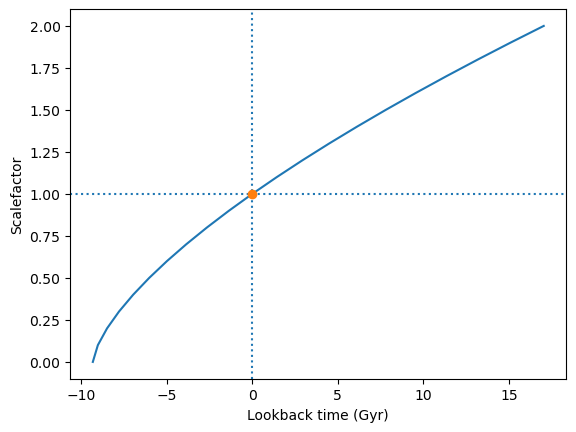

In [8]:
# You might be interested to know that python has some shortcuts.  The whole step above (except the plotting) 
#  can be done in one line:
t_lookback_Gyr = np.array([integrate.quad(adotinv_flatmatter, 1.0, a_end)[0] for a_end in a_arr])/H0y

plt.plot(t_lookback_Gyr,a_arr) 
plt.axvline(x=0,linestyle=':') # Plot some crosshairs 
plt.axhline(y=1,linestyle=':')
plt.plot(0.0, 1.0,'o') # Put a dot at the current time
plt.xlabel('Lookback time (Gyr)')
plt.ylabel('Scalefactor')
plt.show()

### 1.2.2 Another way to calculate lookback time
If you don't want to do the integral again (integrals can be computationally expensive) you can find the time closest to the present day by finding the index closest to a=1.0, and subtracting that time from all the times in the array.  Give that a go...

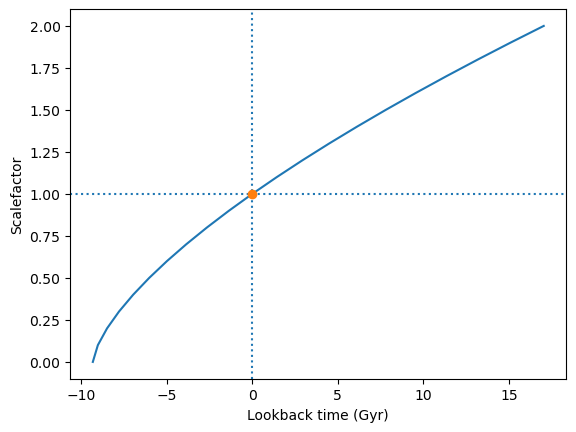

In [9]:
# First calculate the index corresponding to a=1.0.  (Find when |a-1.0| is minimum.  You could also do this by just redoing 
#  the integral from 0<a<1, but the way I've set it up above we know we have an a=1 in the array, so we can just find what we've 
#  already calculated.)
index_today = np.argmin(np.abs(a_arr - 1.0))

# Then find the time corresponding to that index  (note you do NOT have to do the integral again)
age_today = (2*(a_arr[index_today])**(3/2))/(3*H0y)    #  gives the age 9.32Byr (flat matter dom universe age)  a_arr[index_today]=1 puts 1 for a into equation 3

age = np.array([(2*(a_arr[index])**(3/2))/(3*H0y) for index in range(len(a_arr))])  #calculates the age acorss all a's, 0 to 2. 

t2_lookback_Gyr =  age - age_today                #  lookback time, is age of universe (at a=a) - age today (at a=1)


# Uncomment the commands below to plot your result
plt.plot(t2_lookback_Gyr,a_arr) 
plt.axvline(x=0,linestyle=':') # Plot some crosshairs 
plt.axhline(y=1,linestyle=':')
plt.plot(0.0, 1.0,'o') # Put a dot at the current time
plt.xlabel('Lookback time (Gyr)')
plt.ylabel('Scalefactor')
plt.show()

## 1.3 More complex models

In general Friedmann's equation gives,

$$ H(a)^2\equiv \frac{\dot{a}^2}{a^2} = H_0^2 \sum_i \Omega_i a^{-3(1+w_i)}, $$

where the $\Omega_i$ correspond to different components of the universe (like matter) and $w_i$ are the corresponding equations of state. 

Writing that out more fully we should consider 
matter density $\Omega_M$ (includes normal and dark matter and $w_M=0$); 
curvature $\Omega_K=1.0-\Omega_M-\Omega_\Lambda$ ($w_K=-1/3$);
and cosmological constant $\Omega_\Lambda$ ($w_\Lambda=-1$).  

Later we'll consider a more general dark energy $\Omega_x$ ($w_x=$ unknown), and also add radiation density $\Omega_R$ ($w_R=1/3$). 

Expanding the sum above for a universe with matter and a cosmological constant we get,
$$ \frac{\dot{a}}{a} = H_0 \left[\Omega_M a^{-3}+\Omega_K a^{-2} + \Omega_\Lambda \right]^{1/2}. $$

Now let's integrate this more complex function.

if universe parameters are (ΩM,ΩΛ,ΩK) = (0.30,0.70, 0.00)
Age of this universe = 13.47 Gyr


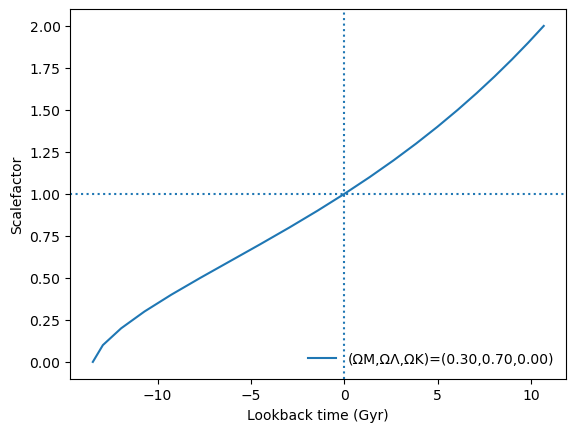

In [10]:
# First write a function that takes as input a, Omega_M (om), and Omega_Lambda (ol) and outputs 1/adot

def adotinv(a,om,ol,ok):
    #adot = a*(np.sqrt(om * a**(-3) + ol)) # eqaution (6) = adot  (/H0)  (ignoring curvature)
    adot = a*(np.sqrt((om * a**(-3)) + (ok * a**(-2)) + ol)) # EQUATION 6 = adot/H     (NO ANALYTICAL SOL'n)
    return 1.0/adot

# Calculate for the universe we think we live in, with approximately matter density 0.3 and cosmological constant 0.7
om = 0.3  # Matter
ol = 0.7  # Lambda
ok = 1-om-ol  # curvature

# Note that when you integrate something with more than one argument you pass it with args=(arg1,arg2) in the integrate function
# e.g. "integrate.quad(adotinv, lower_limit, uper_limit, args=(om,ol))""
t_lookback_Gyr = integrate.quad(adotinv, 0, 1, args=(om,ol,ok))  # RHS = RHS of EQN (8)* H_0   Note: integral limits in green, they are between what values of a you want to know the time for
age_Gyr = t_lookback_Gyr[0]/H0y
print('if universe parameters are (ΩM,ΩΛ,ΩK) = (%.2f,%.2f, %.2f)'%(om,ol,ok))
print('Age of this universe = %.2f Gyr'%(age_Gyr))


# same as equation above (RHS of EQN 8), but across an array of a's, and getting rid of the * H0:
t_lookback_Gyr = np.array([integrate.quad(adotinv, 1.0, a_end, args=(om,ol,ok))[0] for a_end in a_arr])/H0y



# Uncomment these commands to plot this new model (note I've added a label that can be used in the legend)
#plt.plot(t_lookback_Gyr,a_arr,label='(ΩM,ΩΛ)(ΩM,ΩΛ)(\Omega_M,\Omega_\Lambda)=(%.2f,%.2f)'%(om,ol))
plt.plot(t_lookback_Gyr,a_arr,label='(ΩM,ΩΛ,ΩK)=(%.2f,%.2f,%.2f)'%(om,ol,ok))
#plt.plot(t_lookback_Gyr,a_arr) 
plt.axvline(x=0,linestyle=':') # Plot some crosshairs 
plt.axhline(y=1,linestyle=':')
plt.xlabel('Lookback time (Gyr)')
plt.ylabel('Scalefactor')
plt.legend(loc='lower right',frameon=False)
plt.show()

### 1.3.1 Your turn!  Build your own universes!
Change the input matter density and cosmological constant.
 - Can you make a universe that recollapses?
 - What about one that has a bounce instead of a Big Bang in the past?
 - What about one that always decelerates but never recollapses?
 - Can you find any really weird behaviour?  If so can you explain it?

1.3.1a) RECOLLAPSE:  om, ol = 1.1, 0   prints out to a=11  then recollapses.
This is because ok is negative. ANY negative ok in a ol=0 universe will recollapse, therefore any om>1

TO fully plot the recollapsing universe: 

find the turning point,  redo integral form maximum scale factor down to 0

or take the array reverse...

if universe parameters are (ΩM,ΩΛ,ΩK) = (1.10,0.00, -0.10)
Age of this universe = 9.14 Gyr


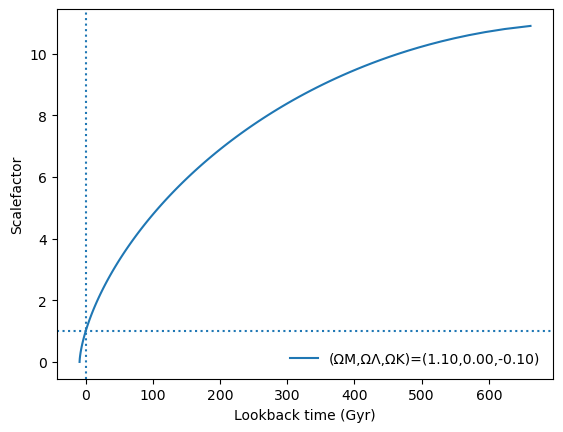

In [112]:
# Start by making an array of scalefactors
astart = 0.0
astop = 11
astep = 0.1 # Make this finer to make the plot smoother
a_arr = np.arange(astart,astop,astep)

# First write a function that takes as input a, Omega_M (om), and Omega_Lambda (ol) and outputs 1/adot

def adotinv(a,om,ol,ok):
    #adot = a*(np.sqrt(om * a**(-3) + ol)) # eqaution (6) = adot  (/H0)  (ignoring curvature)
    adot = a*(np.sqrt((om * a**(-3)) + (ok * a**(-2)) + ol)) # EQUATION 6 = adot/H     (NO ANALYTICAL SOL'n)
    return 1.0/adot

# Calculate for the universe we think we live in, with approximately matter density 0.3 and cosmological constant 0.7
om = 1.1  # Matter
ol = 0  # Lambda
ok = 1-om-ol  # curvature

# Note that when you integrate something with more than one argument you pass it with args=(arg1,arg2) in the integrate function
# e.g. "integrate.quad(adotinv, lower_limit, uper_limit, args=(om,ol))""
t_lookback_Gyr = integrate.quad(adotinv, 0, 1, args=(om,ol,ok))  # RHS = RHS of EQN (8)* H_0   Note: integral limits in green, they are between what values of a you want to know the time for
age_Gyr = t_lookback_Gyr[0]/H0y
print('if universe parameters are (ΩM,ΩΛ,ΩK) = (%.2f,%.2f, %.2f)'%(om,ol,ok))
print('Age of this universe = %.2f Gyr'%(age_Gyr))


# same as equation above (RHS of EQN 8), but across an array of a's, and getting rid of the * H0:
t_lookback_Gyr = np.array([integrate.quad(adotinv, 1.0, a_end, args=(om,ol,ok))[0] for a_end in a_arr])/H0y



# Uncomment these commands to plot this new model (note I've added a label that can be used in the legend)
#plt.plot(t_lookback_Gyr,a_arr,label='(ΩM,ΩΛ)(ΩM,ΩΛ)(\Omega_M,\Omega_\Lambda)=(%.2f,%.2f)'%(om,ol))
plt.plot(t_lookback_Gyr,a_arr,label='(ΩM,ΩΛ,ΩK)=(%.2f,%.2f,%.2f)'%(om,ol,ok))
#plt.plot(t_lookback_Gyr,a_arr) 
plt.axvline(x=0,linestyle=':') # Plot some crosshairs 
plt.axhline(y=1,linestyle=':')
plt.xlabel('Lookback time (Gyr)')
plt.ylabel('Scalefactor')
plt.legend(loc='lower right',frameon=False)
plt.show()

1.3.1a) RECOLLAPSE: om, ol = 1.1, 0 prints out to a=11 then recollapses.
according to eqaution 20 in the theory notes (Caroll, Press and Turner 1992): UNIVERSE CAN ALSO RECOLLAPSE if Om is greater than 1, IF ol takes on:  4*om(cos1/3cos^-1(1-om/om)+4*pi/3))^3

if universe parameters are (ΩM,ΩΛ,ΩK) = (1.50,0.01, -0.51)
Age of this universe = 8.55 Gyr


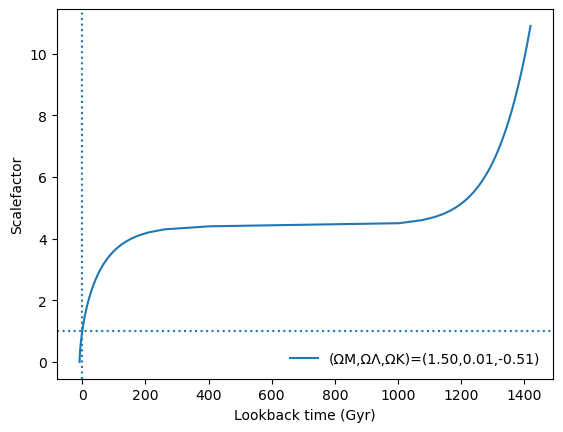

In [5]:
om = 1.5    # has to be larger than 1 to get a recollapsing universe
c = ((1-om)/om)
mid = ((1/3)*np.arccos(c))+((4*np.pi)/3)
max_ol = ((np.cos(mid))**3)*4*om 
ol = max_ol  + 0.00000001  #   has to be lower to get a collapsing universe  (slightly more will expand forever)
ok = 1-om-ol  # curvature

astart = 0.0
astop = 11
astep = 0.1 # Make this finer to make the plot smoother
a_arr = np.arange(astart,astop,astep)

def adotinv(a,om,ol,ok):
    #adot = a*(np.sqrt(om * a**(-3) + ol)) # eqaution (6) = adot  (/H0)  (ignoring curvature)
    adot = a*(np.sqrt((om * a**(-3)) + (ok * a**(-2)) + ol)) # EQUATION 6 = adot/H     (NO ANALYTICAL SOL'n)
    return 1.0/adot


# Note that when you integrate something with more than one argument you pass it with args=(arg1,arg2) in the integrate function
# e.g. "integrate.quad(adotinv, lower_limit, uper_limit, args=(om,ol))""
t_lookback_Gyr = integrate.quad(adotinv, 0, 1, args=(om,ol,ok))  # RHS = RHS of EQN (8)* H_0   Note: integral limits in green, they are between what values of a you want to know the time for
age_Gyr = t_lookback_Gyr[0]/H0y
print('if universe parameters are (ΩM,ΩΛ,ΩK) = (%.2f,%.2f, %.2f)'%(om,ol,ok))
print('Age of this universe = %.2f Gyr'%(age_Gyr))


# same as equation above (RHS of EQN 8), but across an array of a's, and getting rid of the * H0:
t_lookback_Gyr = np.array([integrate.quad(adotinv, 1.0, a_end, args=(om,ol,ok))[0] for a_end in a_arr])/H0y



# Uncomment these commands to plot this new model (note I've added a label that can be used in the legend)
#plt.plot(t_lookback_Gyr,a_arr,label='(ΩM,ΩΛ)(ΩM,ΩΛ)(\Omega_M,\Omega_\Lambda)=(%.2f,%.2f)'%(om,ol))
plt.plot(t_lookback_Gyr,a_arr,label='(ΩM,ΩΛ,ΩK)=(%.2f,%.2f,%.2f)'%(om,ol,ok))
#plt.plot(t_lookback_Gyr,a_arr) 
plt.axvline(x=0,linestyle=':') # Plot some crosshairs 
plt.axhline(y=1,linestyle=':')
plt.xlabel('Lookback time (Gyr)')
plt.ylabel('Scalefactor')
plt.legend(loc='lower right',frameon=False)
plt.show()

1.3.1b) BOUNCE universe:  

C:\Users\ScotDevlin\AppData\Local\Temp\ipykernel_22300\3571295922.py:11: RuntimeWarning: invalid value encountered in sqrt
  adot = a*(np.sqrt((om * a**(-3)) + (ok * a**(-2)) + ol)) # EQUATION 6 = adot/H     (NO ANALYTICAL SOL'n)
C:\Users\ScotDevlin\AppData\Local\Temp\ipykernel_22300\3571295922.py:21: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  t_lookback_Gyr = integrate.quad(adotinv, 0, 1, args=(om,ol,ok))  # RHS = RHS of EQN (8)* H_0   Note: integral limits in green, they are between what values of a you want to know the time for
C:\Users\ScotDevlin\AppData\Local\Temp\ipykernel_22300\3571295922.py:28: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  t_lookback_Gyr = np.array([integrate.quad(adotinv, 1.0, a_end, args=(om,ol,ok))[0] for a_end in a

if universe parameters are (ΩM,ΩΛ,ΩK) = (0.00,10.00, -9.00)
Age of this universe = nan Gyr


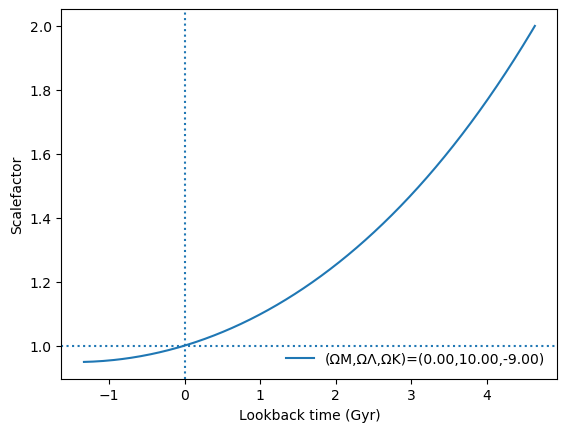

In [31]:
# Start by making an array of scalefactors
astart = 0.0
astop = 2
astep = 0.001 # Make this finer to make the plot smoother
a_arr = np.arange(astart,astop,astep)

# First write a function that takes as input a, Omega_M (om), and Omega_Lambda (ol) and outputs 1/adot

def adotinv(a,om,ol,ok):
    #adot = a*(np.sqrt(om * a**(-3) + ol)) # eqaution (6) = adot  (/H0)  (ignoring curvature)
    adot = a*(np.sqrt((om * a**(-3)) + (ok * a**(-2)) + ol)) # EQUATION 6 = adot/H     (NO ANALYTICAL SOL'n)
    return 1.0/adot

# Calculate for the universe we think we live in, with approximately matter density 0.3 and cosmological constant 0.7
om = 0  # Matter
ol = 10  # Lambda
ok = 1-om-ol  # curvature

# Note that when you integrate something with more than one argument you pass it with args=(arg1,arg2) in the integrate function
# e.g. "integrate.quad(adotinv, lower_limit, uper_limit, args=(om,ol))""
t_lookback_Gyr = integrate.quad(adotinv, 0, 1, args=(om,ol,ok))  # RHS = RHS of EQN (8)* H_0   Note: integral limits in green, they are between what values of a you want to know the time for
age_Gyr = t_lookback_Gyr[0]/H0y
print('if universe parameters are (ΩM,ΩΛ,ΩK) = (%.2f,%.2f, %.2f)'%(om,ol,ok))
print('Age of this universe = %.2f Gyr'%(age_Gyr))


# same as equation above (RHS of EQN 8), but across an array of a's, and getting rid of the * H0:
t_lookback_Gyr = np.array([integrate.quad(adotinv, 1.0, a_end, args=(om,ol,ok))[0] for a_end in a_arr])/H0y



# Uncomment these commands to plot this new model (note I've added a label that can be used in the legend)
#plt.plot(t_lookback_Gyr,a_arr,label='(ΩM,ΩΛ)(ΩM,ΩΛ)(\Omega_M,\Omega_\Lambda)=(%.2f,%.2f)'%(om,ol))
plt.plot(t_lookback_Gyr,a_arr,label='(ΩM,ΩΛ,ΩK)=(%.2f,%.2f,%.2f)'%(om,ol,ok))
#plt.plot(t_lookback_Gyr,a_arr) 
plt.axvline(x=0,linestyle=':') # Plot some crosshairs 
plt.axhline(y=1,linestyle=':')
plt.xlabel('Lookback time (Gyr)')
plt.ylabel('Scalefactor')
plt.legend(loc='lower right',frameon=False)
plt.show()

see ipad notes: bouncing universe,  NEED large ol  but a large ol  ends up with sqrt(-) number, so it doesnt plot...
    to do:  maybe could take the absolute value...??

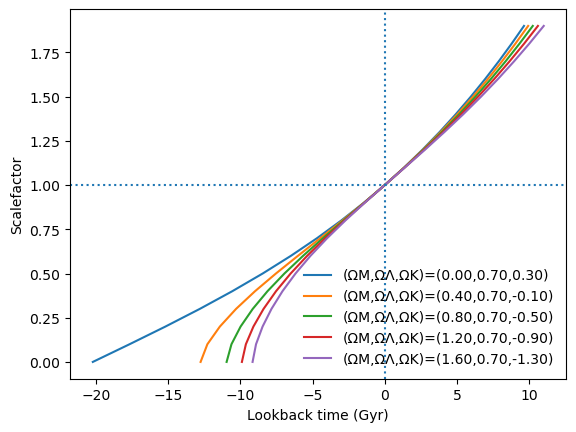

1.3.1c) Universe that always decelerates but never recollapses  (om limit is 1  anything more recollapses given big enough astop, set ol =0)

if universe parameters are (ΩM,ΩΛ,ΩK) = (1.00,0.00, 0.00)
Age of this universe = 9.32 Gyr


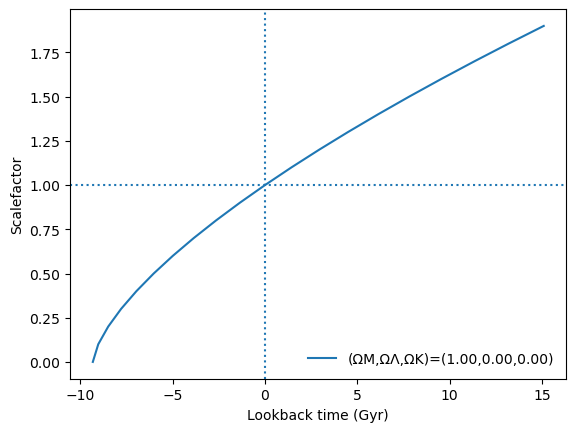

In [70]:
astart = 0.0
astop = 2
astep = 0.1 # Make this finer to make the plot smoother
a_arr = np.arange(astart,astop,astep)


def adotinv(a,om,ol,ok):
    adot = a*(np.sqrt((om * a**(-3)) + (ok * a**(-2)) + ol)) # EQUATION 6 = adot/H     (NO ANALYTICAL SOL'n)
    return 1.0/adot

# Calculate for the universe we think we live in, with approximately matter density 0.3 and cosmological constant 0.7
om = 1 # Matter
ol = 0 # Lambda
ok = 1-om-ol  # curvature


t_lookback_Gyr = integrate.quad(adotinv, 0, 1, args=(om,ol,ok))  # RHS = RHS of EQN (8)* H_0   Note: integral limits in green, they are between what values of a you want to know the time for
age_Gyr = t_lookback_Gyr[0]/H0y
print('if universe parameters are (ΩM,ΩΛ,ΩK) = (%.2f,%.2f, %.2f)'%(om,ol,ok))
print('Age of this universe = %.2f Gyr'%(age_Gyr))


# same as equation above (RHS of EQN 8), but across an array of a's, and getting rid of the * H0:
t_lookback_Gyr = np.array([integrate.quad(adotinv, 1.0, a_end, args=(om,ol,ok))[0] for a_end in a_arr])/H0y



# Uncomment these commands to plot this new model (note I've added a label that can be used in the legend)
#plt.plot(t_lookback_Gyr,a_arr,label='(ΩM,ΩΛ)(ΩM,ΩΛ)(\Omega_M,\Omega_\Lambda)=(%.2f,%.2f)'%(om,ol))
plt.plot(t_lookback_Gyr,a_arr,label='(ΩM,ΩΛ,ΩK)=(%.2f,%.2f,%.2f)'%(om,ol,ok))
#plt.plot(t_lookback_Gyr,a_arr) 
plt.axvline(x=0,linestyle=':') # Plot some crosshairs 
plt.axhline(y=1,linestyle=':')
plt.xlabel('Lookback time (Gyr)')
plt.ylabel('Scalefactor')
plt.legend(loc='lower right',frameon=False)
plt.show()

1.3.1d) Can you find any really weird behaviour? If so can you explain it?

### 1.3.2 Plot many universes on the same plot
Now you can take that all and put it in a loop if you like, to compare different universes:


varying DE. (cosmological constant - because ΩΛ isnt multiplyed by a at all)

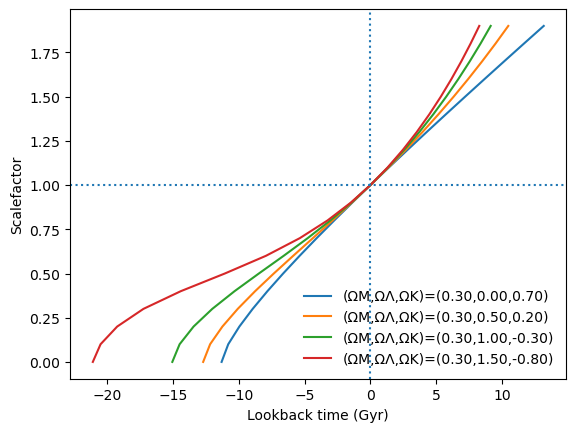

In [77]:
def adotinv(a,om,ol,ok):
    adot = a*(np.sqrt(om * a**(-3) + ok * a**(-2) + ol)) # eqaution (6) = adot/H 
    return 1.0/adot

ol_arr = np.arange(0,2,0.5)
om = 0.3


for ol in ol_arr:                   # om could be i or any letter.
    ok = 1-om-ol
    t_lookback_Gyr = np.array([integrate.quad(adotinv, 1.0, a_end, args=(om,ol,ok))[0] for a_end in a_arr])/H0y
    plt.plot(t_lookback_Gyr,a_arr,label='(ΩM,ΩΛ,ΩK)=(%.2f,%.2f,%.2f)'%(om,ol,ok))
    
plt.axvline(x=0,linestyle=':') # Plot some crosshairs 
plt.axhline(y=1,linestyle=':')
plt.xlabel('Lookback time (Gyr)')
plt.ylabel('Scalefactor')
plt.legend(loc='lower right',frameon=False)
plt.show()

In [ ]:
varying Matter

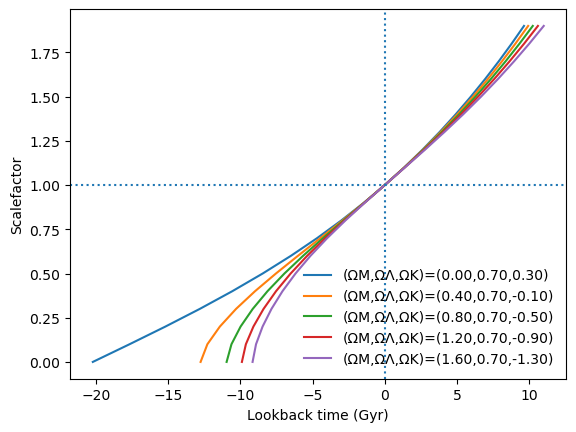

In [74]:
def adotinv(a,om,ol,ok):
    adot = a*(np.sqrt(om * a**(-3) + ok * a**(-2) + ol)) # eqaution (6) = adot/H 
    return 1.0/adot

om_arr = np.arange(0,2,0.4)
ol = 0.7
# ok = 1-om_arr-ol   # curvature


for om in om_arr:                   # om could be i or any letter.
    ok = 1-om-ol
    t_lookback_Gyr = np.array([integrate.quad(adotinv, 1.0, a_end, args=(om,ol,ok))[0] for a_end in a_arr])/H0y
    plt.plot(t_lookback_Gyr,a_arr,label='(ΩM,ΩΛ,ΩK)=(%.2f,%.2f,%.2f)'%(om,ol,ok))
    
plt.axvline(x=0,linestyle=':') # Plot some crosshairs 
plt.axhline(y=1,linestyle=':')
plt.xlabel('Lookback time (Gyr)')
plt.ylabel('Scalefactor')
plt.legend(loc='lower right',frameon=False)
plt.show()

### 1.3.3 Your turn!  Add even more complex models...
Congratulations, you can now calculate how the expansion of the universe proceeds with time! 

From here you can play with the input parameters.  What happens when you:
 - fix the cosmological constant and change matter density?
 - add radiation?
 - add dark energy with a different equation of state?

You might find it useful to make a more general `adotinv` function that takes into account all these possibilities.

1.3.3a) Fixing the cosmological constant and changing the matter desnisty.

See plot above - No matter density (the blue line) is a exponentially expanding universe, an always accelerating universe.

As matter density increases, the expansion history has more deceleration and the future has less acceleration.

1.3.3b) Add radiation

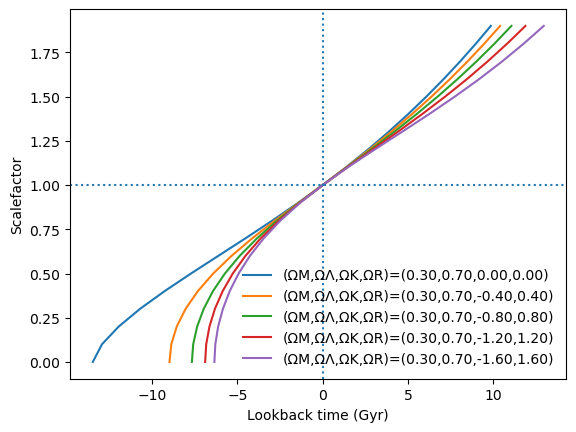

In [101]:
def adotinv(a,om,ol,ok,Or):
    adot = a*(np.sqrt(om * a**(-3) + ok * a**(-2) + ol + Or * a**(-4)))  # EQUATION 9 = adot/H 
    return 1.0/adot

#Or_arr = np.arange(0,0.6,0.1)
Or_arr = np.arange(0,(2),(0.4))
ol = 0.7
om = 0.3

astart = 0.0
astop = 2
astep = 0.1 # Make this finer to make the plot smoother
a_arr = np.arange(astart,astop,astep)


for Or in Or_arr:                   # om could be i or any letter.
    ok = 1-om-ol-Or
    t_lookback_Gyr = np.array([integrate.quad(adotinv, 1.0, a_end, args=(om,ol,ok,Or))[0] for a_end in a_arr])/H0y
    plt.plot(t_lookback_Gyr,a_arr,label='(ΩM,ΩΛ,ΩK,ΩR)=(%.2f,%.2f,%.2f,%.2f)'%(om,ol,ok,Or))
    
plt.axvline(x=0,linestyle=':') # Plot some crosshairs 
plt.axhline(y=1,linestyle=':')
plt.xlabel('Lookback time (Gyr)')
plt.ylabel('Scalefactor')
plt.legend(loc='lower right',frameon=False)
plt.show()

1.3.3b) Add radiation AND use CURRENT VALUE for Or is 6*10^-5 (when H_0 is 70km/s/Mpc)

if universe parameters are (ΩM,ΩΛ,ΩK,ΩR) = (0.30,0.70,0.00,0.000000)
Age of this universe = 13.474 Gyr
if universe parameters are (ΩM,ΩΛ,ΩK,ΩR) = (0.30,0.70,-0.00,0.000060)
Age of this universe = 13.471 Gyr
if universe parameters are (ΩM,ΩΛ,ΩK,ΩR) = (0.30,0.70,-0.00,0.000120)
Age of this universe = 13.468 Gyr


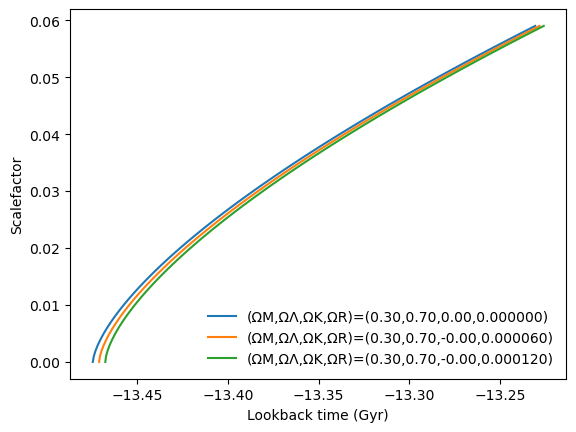

In [32]:
def adotinv(a,om,ol,ok,Or):
    adot = a*(np.sqrt(om * a**(-3) + ok * a**(-2) + ol + Or * a**(-4)))  # EQUATION 9 = adot/H 
    return 1.0/adot

#Or_arr = np.arange(0,0.6,0.1)
Or_arr = np.arange(0,(18*10**-5),(6*10**-5))
ol = 0.7
om = 0.3

a_arr = np.arange(0.0,0.06,0.001)

for Or in Or_arr:                   # om could be i or any letter.
    ok = 1-om-ol-Or
    t_lookback_Gyr = np.array([integrate.quad(adotinv, 1.0, a_end, args=(om,ol,ok,Or))[0] for a_end in a_arr])/H0y
    plt.plot(t_lookback_Gyr,a_arr,label='(ΩM,ΩΛ,ΩK,ΩR)=(%.2f,%.2f,%.2f,%.6f)'%(om,ol,ok,Or))
    #next lines for print statement
    t_lookback_Gyr = integrate.quad(adotinv, 0, 1, args=(om,ol,ok,Or))  # RHS = RHS of EQN ()* H_0   Note: integral limits in green, they are between what values of a you want to know the time for
    age_Gyr = t_lookback_Gyr[0]/H0y
    print('if universe parameters are (ΩM,ΩΛ,ΩK,ΩR) = (%.2f,%.2f,%.2f,%.6f)'%(om,ol,ok,Or))
    print('Age of this universe = %.3f Gyr'%(age_Gyr))
    
#plt.axvline(x=0,linestyle=':') # Plot some crosshairs 
#plt.axhline(y=1,linestyle=':')
plt.xlabel('Lookback time (Gyr)')
plt.ylabel('Scalefactor')
plt.legend(loc='lower right',frameon=False)
plt.show()



1.3.3.c)  Dark energy with a different equation of state (ie. not the comsological constant)
FLAT wCDM model 

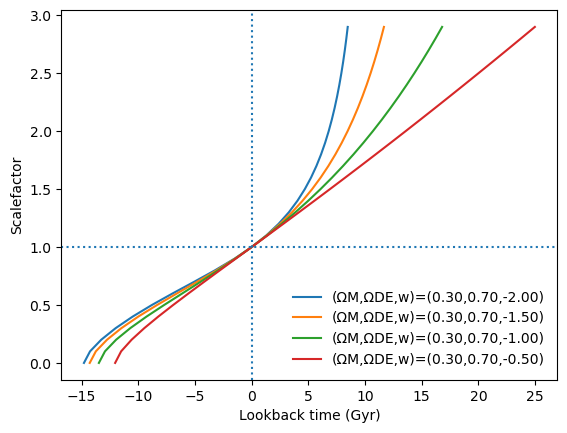

In [41]:
om = 0.3 # Matter
oD = (1-om) # Dark energy  

a_arr = np.arange(0.0,3,0.1)
w_arr = np.arange(-2,0,0.5)

for w in w_arr:
    def adotinv(a,oD,om,w):
        adot = a*(np.sqrt((om * a**(-3)) + oD * a**(-3*(1+w)))) # EQUATION  = adot/H     
        return 1.0/adot
    
for w in w_arr:
        t_lookback_Gyr = np.array([integrate.quad(adotinv, 1.0, a_end, args=(oD,om,w))[0] for a_end in a_arr])/H0y
        plt.plot(t_lookback_Gyr,a_arr,label='(ΩM,ΩDE,w)=(%.2f,%.2f,%.2f)'%(om,oD,w))
        
plt.axvline(x=0,linestyle=':') # Plot some crosshairs 
plt.axhline(y=1,linestyle=':')
plt.xlabel('Lookback time (Gyr)')
plt.ylabel('Scalefactor')
plt.legend(loc='lower right',frameon=False)
plt.show()

You can see as w is lower, the D.E. has more influence in the future 
AND less in the past. ie. the deceleration of the w=-2 line is less than the -0.5 line